# Importing Dataset:
# https://www.kaggle.com/datasets/arashnic/game-review-dataset

In this dataset, under train_gt there exists a csv file called train.csv. Columns are review_id, title, year, user_review, user_suggestion. The "X" value will be user_review. This will be a user's review of a game in text. The "y" value will be user_suggestion. This will be if the review of the game is positive or negative (1 or 0). The other columns are discarded. The purpose is to determine a review's score from some review text.

In [2]:
import pandas as pd
df = pd.read_csv('train.csv', header=0, usecols=[3, 4], encoding='latin-1')
print('rows and columns:', df.shape)
print(df.head())

rows and columns: (17494, 2)
                                         user_review  user_suggestion
0  I'm scared and hearing creepy voices.  So I'll...                1
1  Best game, more better than Sam Pepper's YouTu...                1
2  A littly iffy on the controls, but once you kn...                1
3  Great game, fun and colorful and all that.A si...                1
4  Not many games have the cute tag right next to...                1


# Text Preprocessing:

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Splitting the data
Split the data into train and test sets. 20% of the data going to the test set.

In [ ]:
# split df into train and test
import numpy as np

i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (13971, 2)
test data size:  (3523, 2)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import datasets, layers, models, preprocessing

# Tokenize the texts
max_words = 10000  # Consider only top 25000 words
maxlen = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train.user_review)

x_train = tokenizer.texts_to_matrix(train.user_review, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.user_review, mode='tfidf')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train.user_suggestion)
y_train = encoder.transform(train.user_suggestion)
y_test = encoder.transform(test.user_suggestion)

In [ ]:
# check shape and label
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test labels:", y_test)

train shapes: (13971, 10000) (13971,)
test shapes: (3523, 10000) (3523,)
test labels: [1 1 1 ... 1 1 1]


# 1. Graph

<ipython-input-7-33cf0e8d6230>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='user_suggestion', data=df, palette="Set2")


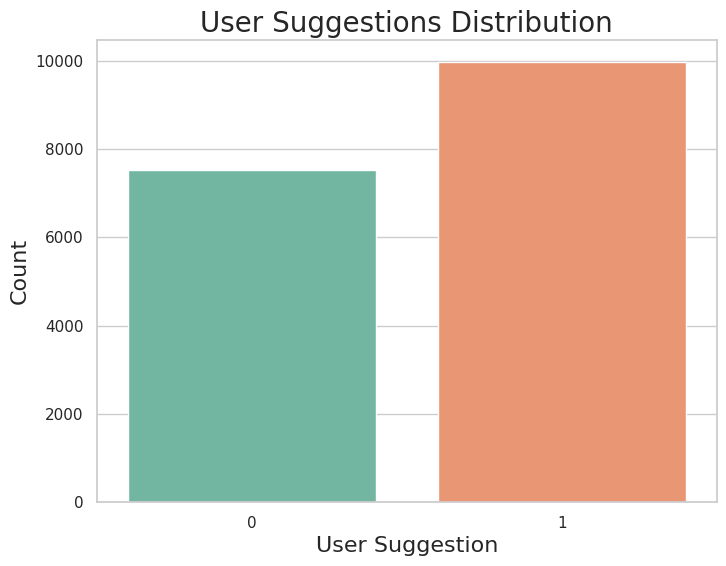

In [ ]:
Timport seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set(style="whitegrid")


# Adjust the figure size
plt.figure(figsize=(8, 6))

# Adjust the color palette
sns.countplot(x='user_suggestion', data=df, palette="Set2")

# Change font size for x-axis and label
plt.xlabel('User Suggestion', fontsize=16)
# Change font size for y-axis and label
plt.ylabel('Count', fontsize=16)

# Increase font size for title
plt.title('User Suggestions Distribution', fontsize=20)

plt.show()

# 2. Sequential Model

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models, preprocessing

In [ ]:
model = models.Sequential()

model.add(layers.Dense(32, input_dim=max_words, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
175/175 [==============================] - 3s 12ms/step - loss: 0.4719 - accuracy: 0.7887 - val_loss: 0.5103 - val_accuracy: 0.7560
Epoch 2/3
175/175 [==============================] - 2s 10ms/step - loss: 0.2568 - accuracy: 0.9035 - val_loss: 0.4404 - val_accuracy: 0.8100
Epoch 3/3
175/175 [==============================] - 2s 9ms/step - loss: 0.1721 - accuracy: 0.9364 - val_loss: 0.4634 - val_accuracy: 0.8107


In [ ]:
# Accuracy score
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print('Accuracy: ', score[1])

56/56 [==============================] - 0s 6ms/step - loss: 0.4251 - accuracy: 0.8463
Accuracy:  0.8463258147239685


Try a different model and compile

In [ ]:
model = models.Sequential()

model.add(layers.Dense(32, input_dim=max_words, kernel_initializer='normal', activation='tanh'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='relu'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
87/87 [==============================] - 2s 18ms/step - loss: 0.9603 - accuracy: 0.6356 - val_loss: 0.6461 - val_accuracy: 0.6802
Epoch 2/5
87/87 [==============================] - 1s 14ms/step - loss: 0.3802 - accuracy: 0.8665 - val_loss: 0.6411 - val_accuracy: 0.7715
Epoch 3/5
87/87 [==============================] - 1s 13ms/step - loss: 0.2236 - accuracy: 0.9333 - val_loss: 0.7863 - val_accuracy: 0.7686
Epoch 4/5
87/87 [==============================] - 1s 13ms/step - loss: 0.1445 - accuracy: 0.9624 - val_loss: 0.8643 - val_accuracy: 0.7772
Epoch 5/5
87/87 [==============================] - 1s 13ms/step - loss: 0.1044 - accuracy: 0.9784 - val_loss: 0.9693 - val_accuracy: 0.7801


In [ ]:
# Accuracy score
score = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Accuracy: ', score[1])

28/28 [==============================] - 0s 6ms/step - loss: 0.7637 - accuracy: 0.8287
Accuracy:  0.828723132610321


Let's try one more model

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64, input_dim=max_words, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='tanh'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
174/174 [==============================] - 4s 17ms/step - loss: 0.6447 - accuracy: 0.7685 - val_loss: 0.6827 - val_accuracy: 0.7158
Epoch 2/3
174/174 [==============================] - 3s 14ms/step - loss: 0.2651 - accuracy: 0.9350 - val_loss: 0.7232 - val_accuracy: 0.7560
Epoch 3/3
174/174 [==============================] - 3s 18ms/step - loss: 0.1610 - accuracy: 0.9738 - val_loss: 0.8281 - val_accuracy: 0.7560


In [ ]:
# Accuracy score
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print('Accuracy: ', score[1])

56/56 [==============================] - 0s 6ms/step - loss: 0.7394 - accuracy: 0.8254
Accuracy:  0.825370192527771


# 3. RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Pad sequences to make them uniform length
x_train = pad_sequences(tokenizer.texts_to_sequences(train.user_review), maxlen=maxlen)
x_test = pad_sequences(tokenizer.texts_to_sequences(test.user_review), maxlen=maxlen)

In [ ]:
# Define the RNN model architecture
embedding_dim = 50  # Dimension of the word embeddings
rnn_units = 32  # Number of units in the RNN layer

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(units=rnn_units),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
175/175 [==============================] - 29s 152ms/step - loss: 0.6501 - accuracy: 0.6261 - val_loss: 0.9640 - val_accuracy: 0.4218
Epoch 2/5
175/175 [==============================] - 26s 150ms/step - loss: 0.4021 - accuracy: 0.8368 - val_loss: 0.5213 - val_accuracy: 0.7614
Epoch 3/5
175/175 [==============================] - 26s 150ms/step - loss: 0.1936 - accuracy: 0.9310 - val_loss: 0.5585 - val_accuracy: 0.7628
Epoch 4/5
175/175 [==============================] - 27s 156ms/step - loss: 0.0705 - accuracy: 0.9815 - val_loss: 0.6166 - val_accuracy: 0.7660
Epoch 5/5
175/175 [==============================] - 36s 208ms/step - loss: 0.0244 - accuracy: 0.9966 - val_loss: 0.7291 - val_accuracy: 0.7503


In [ ]:
# Accuracy score
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print('Accuracy: ', score[1])

56/56 [==============================] - 2s 29ms/step - loss: 0.5888 - accuracy: 0.8172
Accuracy:  0.8172012567520142


#3.2 CNN

In [ ]:
embedding_dim = 50  # Dimension of the word embeddings
num_filters = 32
kernel_size = 7

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),  # set learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
175/175 [==============================] - 19s 99ms/step - loss: 0.8886 - accuracy: 0.4716 - val_loss: 0.7619 - val_accuracy: 0.4204
Epoch 2/10
175/175 [==============================] - 17s 98ms/step - loss: 0.6629 - accuracy: 0.6022 - val_loss: 0.7658 - val_accuracy: 0.4222
Epoch 3/10
175/175 [==============================] - 18s 104ms/step - loss: 0.6491 - accuracy: 0.6036 - val_loss: 0.7658 - val_accuracy: 0.4229
Epoch 4/10
175/175 [==============================] - 18s 104ms/step - loss: 0.6316 - accuracy: 0.6084 - val_loss: 0.7355 - val_accuracy: 0.4322
Epoch 5/10
175/175 [==============================] - 18s 105ms/step - loss: 0.6066 - accuracy: 0.6265 - val_loss: 0.7223 - val_accuracy: 0.4558
Epoch 6/10
175/175 [==============================] - 17s 97ms/step - loss: 0.5690 - accuracy: 0.6701 - val_loss: 0.7048 - val_accuracy: 0.4930
Epoch 7/10
175/175 [==============================] - 17s 97ms/step - loss: 0.5123 - accuracy: 0.7428 - val_loss: 0.6683 - val_accura

In [ ]:
# Accuracy score
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print('Accuracy: ', score[1])

56/56 [==============================] - 1s 21ms/step - loss: 0.4950 - accuracy: 0.7848
Accuracy:  0.7848424911499023


# 3.3 LSTM

In [ ]:
embedding_dim = 50  # Dimension of the word embeddings
lstm_units = 32  # Number of units in the RNN layer

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
175/175 [==============================] - 57s 309ms/step - loss: 0.5575 - accuracy: 0.7078 - val_loss: 1.3803 - val_accuracy: 0.4673
Epoch 2/10
175/175 [==============================] - 52s 299ms/step - loss: 0.3559 - accuracy: 0.8499 - val_loss: 0.4348 - val_accuracy: 0.7986
Epoch 3/10
175/175 [==============================] - 52s 300ms/step - loss: 0.2794 - accuracy: 0.8914 - val_loss: 0.4324 - val_accuracy: 0.8107
Epoch 4/10
175/175 [==============================] - 50s 287ms/step - loss: 0.2387 - accuracy: 0.9111 - val_loss: 0.5537 - val_accuracy: 0.7746
Epoch 5/10
175/175 [==============================] - 50s 287ms/step - loss: 0.2108 - accuracy: 0.9211 - val_loss: 0.5282 - val_accuracy: 0.8011
Epoch 6/10
175/175 [==============================] - 53s 305ms/step - loss: 0.1807 - accuracy: 0.9349 - val_loss: 0.4895 - val_accuracy: 0.7950
Epoch 7/10
175/175 [==============================] - 50s 286ms/step - loss: 0.1633 - accuracy: 0.9417 - val_loss: 0.5771 - val_ac

In [ ]:
# Accuracy score
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print('Accuracy: ', score[1])

56/56 [==============================] - 4s 71ms/step - loss: 0.5632 - accuracy: 0.8345
Accuracy:  0.8345160484313965


# 4. Best performing model - LSTM

In [ ]:
# Lets change the dimensions/units

embedding_dim = 128  # Dimension of the word embeddings
lstm_units = 64  # Number of units in the RNN layer

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.LSTM(lstm_units))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
175/175 [==============================] - 122s 689ms/step - loss: 0.5490 - accuracy: 0.7079 - val_loss: 0.6534 - val_accuracy: 0.6902
Epoch 2/5
175/175 [==============================] - 124s 707ms/step - loss: 0.3507 - accuracy: 0.8548 - val_loss: 0.6433 - val_accuracy: 0.7349
Epoch 3/5
175/175 [==============================] - 123s 705ms/step - loss: 0.2841 - accuracy: 0.8897 - val_loss: 0.4930 - val_accuracy: 0.7850
Epoch 4/5
175/175 [==============================] - 122s 697ms/step - loss: 0.2506 - accuracy: 0.9056 - val_loss: 0.5287 - val_accuracy: 0.7818
Epoch 5/5
175/175 [==============================] - 124s 710ms/step - loss: 0.2150 - accuracy: 0.9196 - val_loss: 0.4684 - val_accuracy: 0.7950


In [ ]:
# Accuracy score
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print('Accuracy: ', score[1])

56/56 [==============================] - 11s 194ms/step - loss: 0.3732 - accuracy: 0.8410
Accuracy:  0.841044545173645


# 5. Analysis

The best performing model was the LSTM, where the output dimension = 128, lstm_units = 64, and epochs = 5. The epochs were 5 to prevent overfitting. The accuracy of this model for the test data was 84.1%, which was the most accurate model. CNN was the worst performing model, with 78% accuracy. RNN had an accuracy of 81.7%. Surprisingly, the initial sequential model performed all of the models from part 3 with accuracy of 84.6%.